<a href="https://colab.research.google.com/github/nakkadharanigoud/COE/blob/main/22_01_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [13]:
df=pd.read_csv('/content/Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [14]:
df.shape

(200, 5)

In [15]:
#missing values
df.isnull().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


<Axes: xlabel='TV', ylabel='Count'>

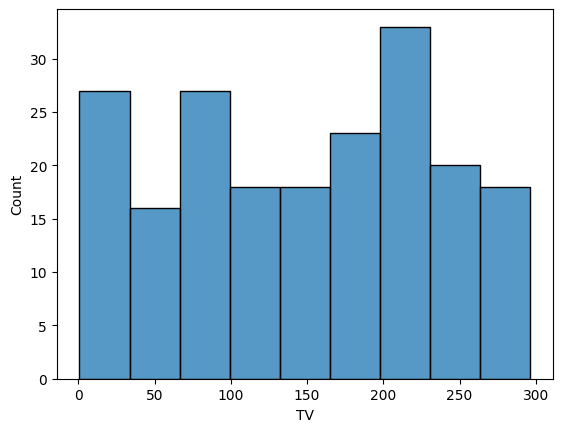

In [16]:
#Distribution of histogram

sns.histplot(x=df["TV"])

<Axes: xlabel='Radio', ylabel='Count'>

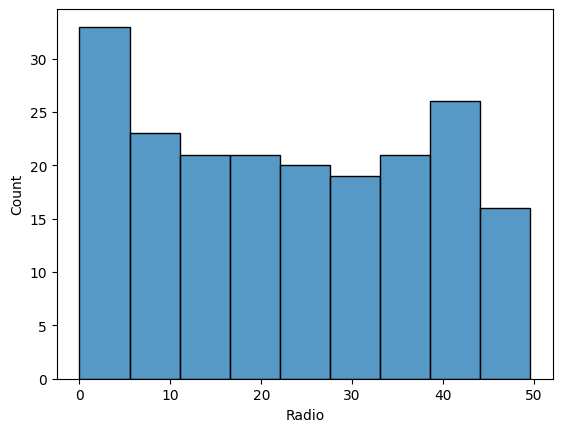

In [17]:
sns.histplot(x=df["Radio"])

<Axes: xlabel='Sales', ylabel='Count'>

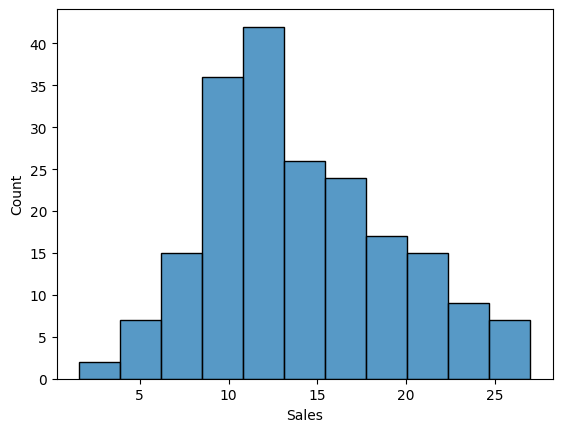

In [18]:
sns.histplot(x=df["Sales"])

<Axes: xlabel='Newspaper', ylabel='Count'>

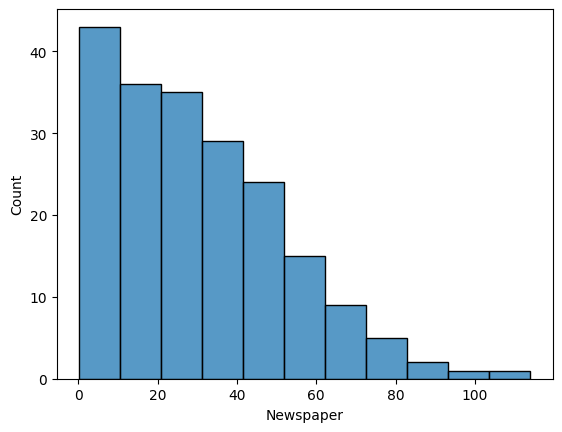

In [19]:
sns.histplot(x=df["Newspaper"])

<Axes: xlabel='Unnamed: 0', ylabel='Count'>

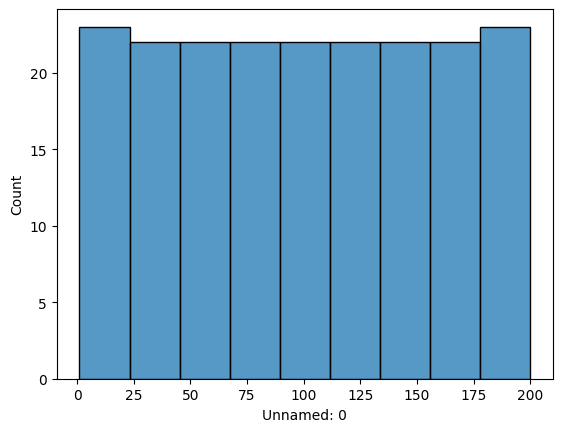

In [20]:
sns.histplot(x=df["Unnamed: 0"])

<Axes: xlabel='TV', ylabel='Count'>

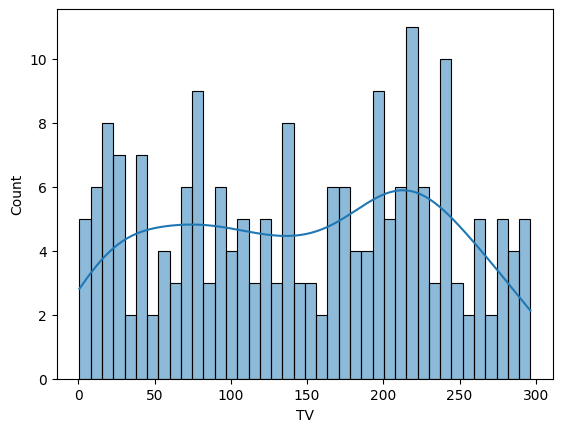

In [21]:
sns.histplot(x=df["TV"],kde=True,bins=40)

<Axes: xlabel='Radio', ylabel='Count'>

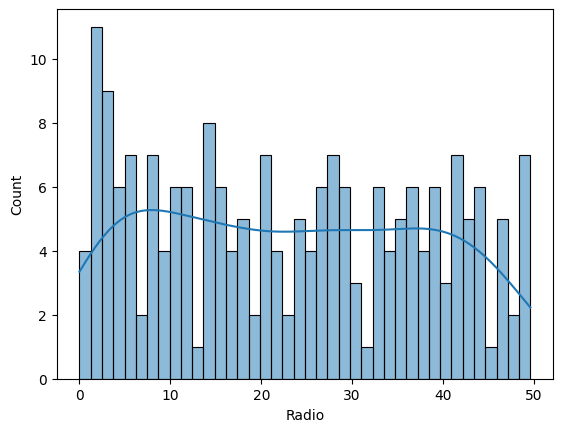

In [22]:
sns.histplot(x=df["Radio"],kde=True,bins=40)

<Axes: xlabel='Sales', ylabel='Count'>

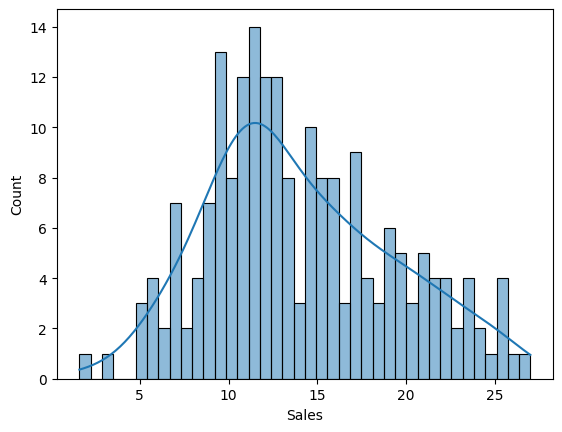

In [23]:
sns.histplot(x=df["Sales"],kde=True,bins=40)

<Axes: xlabel='Newspaper', ylabel='Count'>

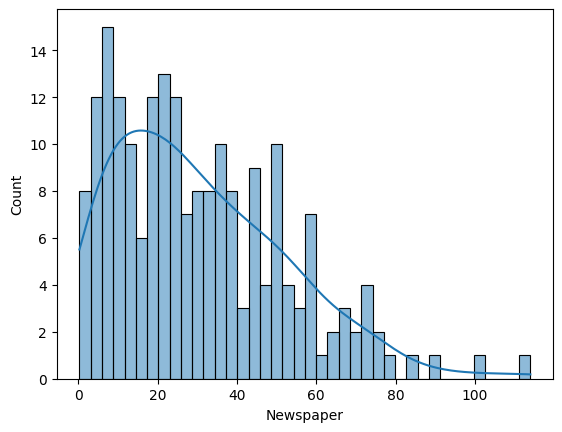

In [24]:
sns.histplot(x=df["Newspaper"],kde=True,bins=40)

<Axes: xlabel='Unnamed: 0', ylabel='Count'>

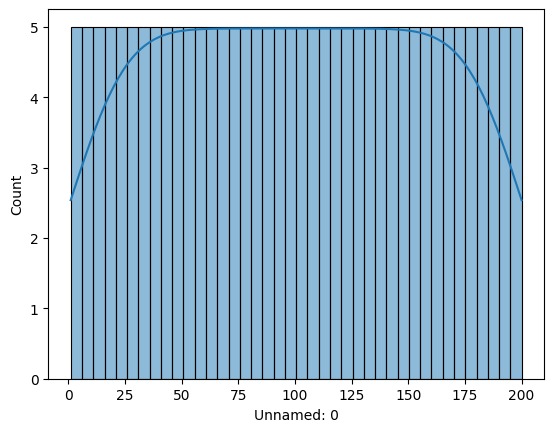

In [25]:
sns.histplot(x=df["Unnamed: 0"],kde=True,bins=40)

In [26]:
df["TV"].skew()

np.float64(-0.06985336213274573)

In [27]:
df["Radio"].skew()

np.float64(0.09417463149664404)

In [28]:
df["Sales"].skew()

np.float64(0.4075714250767127)

In [29]:
df["Newspaper"].skew()

np.float64(0.8947204074986175)

In [30]:
df["Unnamed: 0"].skew()

np.float64(0.0)

TV column is normal in nature, the range is -0.5 to 0.5

0.0 - normal

-0.07 - normal

+0.09 - normal

0.9 - non-normal

0.40 - normal

**Insights**

TV column is normal in nature, the range is -0.5 to 0.5

Radio and Sales and Unnamed: 0 are normal in nature, the range is -0.5 to 0.5

Newspaper column is non-normal in nature,the range is >0.5


<Axes: xlabel='TV', ylabel='Sales'>

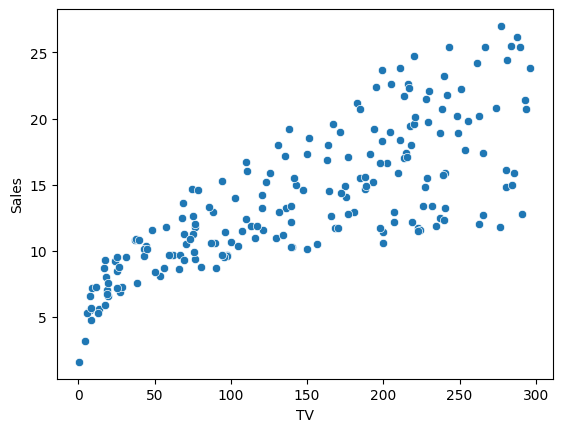

In [31]:
#Scatterplot
sns.scatterplot(x=df["TV"],y=df["Sales"])

<Axes: xlabel='Radio', ylabel='Sales'>

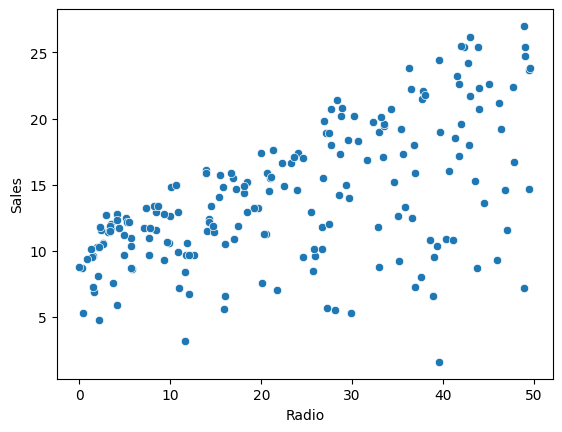

In [32]:
sns.scatterplot(x=df["Radio"],y=df["Sales"])

<Axes: xlabel='Newspaper', ylabel='Sales'>

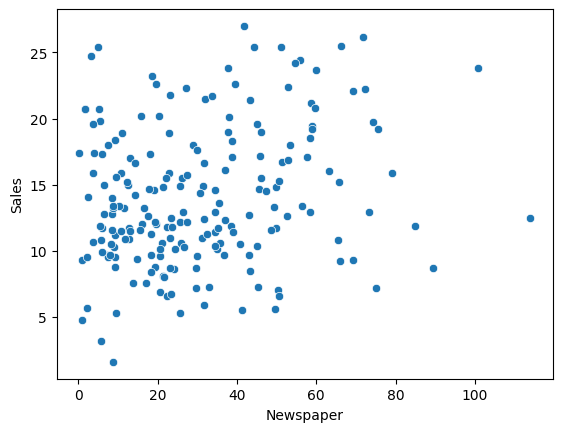

In [33]:
sns.scatterplot(x=df["Newspaper"],y=df["Sales"])

<Axes: xlabel='Unnamed: 0', ylabel='Sales'>

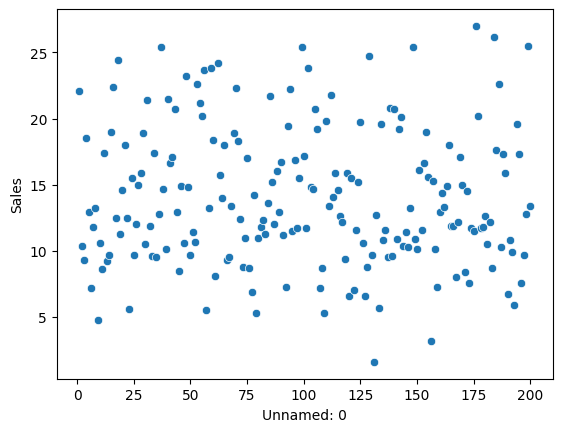

In [34]:
sns.scatterplot(x=df["Unnamed: 0"],y=df["Sales"])

**Relationship bw Sales and other variables**

The relationship bw TV and Sales is positive

The relationship bw Radio and Sales is positive

The relationship bw Newspaper and Sales is random

The relationship bw Unnamed: 0 and Sales is random

In [35]:
df.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


Scale bw -1 to +1

Weak : -0.25 to +0.25

Moderate : -0.5 to +0.5

Strong : -0.7 to +0.7

-Unnamed to Unnamed: Strong

Unnamed to TV: weak

radio: weak

newspaper: weak

sales: weak

-TV to TV: strong

radio: weak

Radio to Radio:strong

newspaper: weak

sales: strong

-tv: weak

radio: weak

newspaper: strong

sales: weak

-tv: strong

radio: moderate

newspaper: weak

sales: strong

<Axes: >

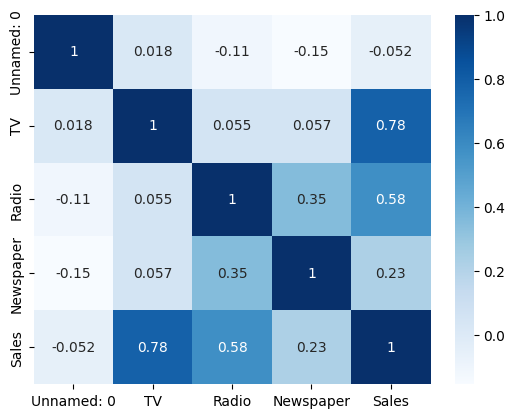

In [36]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [37]:
df.drop('Unnamed: 0', axis=1, inplace=True, errors='ignore')

In [38]:
y=df.Sales

In [39]:
df.drop('Sales',axis=1)

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [42]:
x=df[['TV']]
y=df.Sales

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [44]:
print(len(x_test))
print(len(x_train))

40
160


In [52]:
#step3 Creating model
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
y_predict=LR.predict(x_test)

In [50]:
from sklearn.metrics import(r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error)
r2score=r2_score(y_test,y_predict)
r2score

0.46138746336817515

In [51]:
print("MSE : ",mean_squared_error(y_test,y_predict))
print("MAE : ",mean_absolute_error(y_test,y_predict))
print("RMSE : ",root_mean_squared_error(y_test,y_predict))

MSE :  13.06226628830567
MAE :  2.990565035759226
RMSE :  3.6141757412037494


In [53]:
x=df[['Radio']]
y=df.Sales

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [56]:
print(len(x_test))
print(len(x_train))

40
160


In [57]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
y_predict=LR.predict(x_test)

In [58]:
from sklearn.metrics import(r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error)
r2score=r2_score(y_test,y_predict)
r2score

0.3786450118378575

In [59]:
print("MSE : ",mean_squared_error(y_test,y_predict))
print("MAE : ",mean_absolute_error(y_test,y_predict))
print("RMSE : ",root_mean_squared_error(y_test,y_predict))

MSE :  15.068910882943154
MAE :  3.2689170364697824
RMSE :  3.881869508747448


In [60]:
x=df[['Newspaper']]
y=df.Sales

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [62]:
print(len(x_test))
print(len(x_train))

40
160


In [63]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
y_predict=LR.predict(x_test)

In [64]:
from sklearn.metrics import(r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error)
r2score=r2_score(y_test,y_predict)
r2score

-0.11728796161004928

In [66]:
print("MSE : ",mean_squared_error(y_test,y_predict))
print("MAE : ",mean_absolute_error(y_test,y_predict))
print("RMSE : ",root_mean_squared_error(y_test,y_predict))

MSE :  27.09612547552867
MAE :  3.992290912504232
RMSE :  5.205393882841976


In [67]:
x=df[['TV','Radio','Newspaper']]
y=df.Sales

In [68]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [70]:
print(len(x_test))
print(len(x_train))

40
160


In [71]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
y_predict=LR.predict(x_test)

In [72]:
from sklearn.metrics import(r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error)
r2score=r2_score(y_test,y_predict)
r2score

0.9085774752313167

In [73]:
print("MSE : ",mean_squared_error(y_test,y_predict))
print("MAE : ",mean_absolute_error(y_test,y_predict))
print("RMSE : ",root_mean_squared_error(y_test,y_predict))

MSE :  2.2171510725418964
MAE :  1.2114892606469105
RMSE :  1.4890100982001084


In [74]:
x=df[['TV','Radio']]
y=df.Sales

In [79]:
x

,TV,Radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [76]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
y_predict=LR.predict(x_test)

In [77]:
from sklearn.metrics import(r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error)
r2score=r2_score(y_test,y_predict)
r2score

0.9086623887492478

In [78]:
print("MSE : ",mean_squared_error(y_test,y_predict))
print("MAE : ",mean_absolute_error(y_test,y_predict))
print("RMSE : ",root_mean_squared_error(y_test,y_predict))

MSE :  2.215091775909797
MAE :  1.210808620492933
RMSE :  1.4883184390142443
